In [17]:
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [18]:
master_csv_path = Path("Resources/MLB-player-final-dataset.csv")

master_csv_read = pd.read_csv(master_csv_path)

master_summary_df = pd.DataFrame(master_csv_read)

master_summary_df.drop("Unnamed: 0", axis = 1, inplace = True)

master_summary_df['age_bracket'] = master_summary_df['age_bracket'].astype('category')

pd.set_option('display.max_columns', None)

display(master_summary_df)

,IDfg,Season,Name,Age,G,AB,PA,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,LD%,GB%,FB%,HR/FB,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,CStr%,CSW%,O-Swing%,Z-Swing%,O-Contact%,Z-Contact%,F-Strike%,SwStr%,Zone%,Clutch,UBR,WAR,age_bracket
0,18401,2023,Ronald Acuna Jr.,25,159,643,735,0.109,0.114,0.95,0.416,0.596,1.012,0.258,0.338,0.201,0.495,0.304,0.240,0.397,0.356,0.247,0.101,0.438,0.461,94.7,7.4,86,0.153,121.2,309,0.550,0.137,0.214,0.268,0.728,0.738,0.878,0.589,0.078,0.422,1.16,2.2,8.4,2
1,13611,2023,Mookie Betts,30,152,584,693,0.139,0.154,0.90,0.408,0.579,0.987,0.272,0.316,0.237,0.278,0.485,0.167,0.463,0.355,0.183,0.100,0.490,0.411,92.4,20.6,60,0.125,110.1,232,0.481,0.205,0.262,0.200,0.630,0.643,0.939,0.595,0.058,0.421,-0.72,2.3,8.3,3
2,5361,2023,Freddie Freeman,33,161,637,730,0.099,0.166,0.60,0.410,0.567,0.976,0.235,0.370,0.276,0.353,0.370,0.150,0.365,0.357,0.278,0.106,0.526,0.369,90.0,15.2,58,0.111,110.6,218,0.418,0.114,0.208,0.301,0.792,0.688,0.880,0.614,0.094,0.426,-1.50,1.4,7.9,3
3,14344,2023,Matt Olson,29,162,608,720,0.144,0.232,0.62,0.389,0.604,0.993,0.321,0.302,0.178,0.387,0.436,0.278,0.382,0.373,0.245,0.112,0.461,0.427,93.7,16.1,73,0.164,118.6,245,0.551,0.131,0.249,0.295,0.735,0.695,0.777,0.556,0.119,0.395,-0.60,2.3,6.7,3
4,19755,2023,Shohei Ohtani,28,135,497,599,0.152,0.239,0.64,0.412,0.654,1.066,0.350,0.342,0.182,0.423,0.395,0.312,0.389,0.361,0.249,0.098,0.473,0.429,94.4,13.2,70,0.193,118.6,193,0.533,0.125,0.265,0.333,0.707,0.565,0.814,0.571,0.139,0.393,-2.08,1.7,6.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7562,2437,2013,Maicer Izturis,32,107,365,399,0.068,0.095,0.71,0.288,0.310,0.597,0.074,0.249,0.225,0.520,0.255,0.060,0.387,0.360,0.252,0.162,0.619,0.219,NaN,NaN,0,NaN,NaN,0,NaN,0.201,0.249,0.288,0.609,0.804,0.937,0.569,0.048,0.447,-0.31,0.5,-1.6,3
7563,3856,2013,Jeff Keppinger,33,117,423,451,0.044,0.091,0.49,0.283,0.317,0.600,0.064,0.269,0.244,0.447,0.309,0.034,0.353,0.410,0.237,0.168,0.668,0.165,NaN,NaN,0,NaN,NaN,0,NaN,0.224,0.258,0.273,0.569,0.819,0.970,0.572,0.034,0.482,-0.32,-3.6,-1.7,3
7564,8585,2013,Yuniesky Betancourt,31,137,391,409,0.034,0.174,0.20,0.240,0.355,0.595,0.143,0.226,0.161,0.430,0.409,0.098,0.384,0.381,0.235,0.192,0.474,0.334,NaN,NaN,0,NaN,NaN,0,NaN,0.138,0.238,0.371,0.750,0.704,0.878,0.670,0.100,0.462,0.84,-0.6,-1.8,3
7565,2677,2013,Jordan Pacheco,27,95,247,262,0.038,0.145,0.26,0.276,0.312,0.588,0.073,0.278,0.254,0.488,0.258,0.019,0.379,0.341,0.280,0.166,0.607,0.228,NaN,NaN,0,NaN,NaN,0,NaN,0.201,0.260,0.300,0.631,0.788,0.913,0.626,0.060,0.492,-0.19,-0.2,-1.8,2


In [19]:
master_summary_df['Name'] = master_summary_df['Name'].astype(str)


master_summary_numeric_df = master_summary_df.drop(columns=['Name'])


imputer = SimpleImputer(strategy='mean')


master_summary_numeric_imputed = imputer.fit_transform(master_summary_numeric_df)


scaler = StandardScaler()


master_summary_numeric_scaled = scaler.fit_transform(master_summary_numeric_imputed)


correlation_matrix = master_summary_numeric_df.corr()


display(correlation_matrix)

,IDfg,Season,Age,G,AB,PA,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,LD%,GB%,FB%,HR/FB,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,CStr%,CSW%,O-Swing%,Z-Swing%,O-Contact%,Z-Contact%,F-Strike%,SwStr%,Zone%,Clutch,UBR,WAR,age_bracket
IDfg,1.000000,0.642208,-0.610767,-0.127753,-0.101668,-0.101310,0.040667,0.125654,-0.058368,0.020031,0.031698,0.028396,0.060595,0.048937,-0.030930,-0.027727,0.049267,0.069879,0.018927,-0.026129,0.001826,-0.086330,0.007748,0.066309,0.058160,0.007566,0.130777,0.130202,0.044456,0.102301,0.120138,-0.044655,0.081409,0.042911,0.092389,-0.098861,-0.117083,0.030506,0.142456,-0.176012,0.000751,0.109138,-0.008447,-0.566683
Season,0.642208,1.000000,-0.025648,-0.011826,0.003941,0.007045,0.131390,0.057486,0.028589,0.079316,0.086446,0.087168,0.128875,0.016898,-0.007807,-0.143648,0.166301,0.118447,0.127660,-0.060504,-0.093470,-0.176778,-0.005624,0.155017,0.123939,0.149685,0.319438,0.236551,0.145797,0.315433,0.232214,-0.112996,0.003367,0.047754,0.168948,-0.054246,-0.077258,-0.027390,0.116386,-0.314678,0.011392,0.000310,0.003233,-0.027261
Age,-0.610767,-0.025648,1.000000,0.135772,0.107689,0.111286,0.069726,-0.116113,0.122926,0.031454,0.004153,0.015014,0.002697,-0.066116,0.042601,-0.090340,0.077356,-0.016357,0.070460,-0.018897,-0.064875,-0.040354,0.017405,0.018914,-0.002938,0.090113,0.045096,-0.015186,-0.007283,0.076500,-0.002350,0.018429,-0.081810,-0.067509,-0.021169,0.089040,0.091752,-0.059443,-0.116823,0.015927,0.011769,-0.170281,-0.023253,0.925674
G,-0.127753,-0.011826,0.135772,1.000000,0.969109,0.969461,0.251765,-0.431044,0.343175,0.504818,0.528947,0.540953,0.437637,0.276512,0.155476,-0.275650,0.218662,0.255458,0.173386,-0.046097,-0.159598,-0.270803,-0.142535,0.356974,0.335127,0.224357,0.639329,0.293990,0.536796,0.744372,0.357563,-0.216628,-0.421710,-0.094923,0.180918,0.300367,0.278705,-0.267400,-0.293077,-0.269805,-0.064727,0.034598,0.632894,0.133328
AB,-0.101668,0.003941,0.107689,0.969109,1.000000,0.998480,0.242309,-0.449190,0.354047,0.521087,0.558771,0.566684,0.463955,0.288313,0.155205,-0.283832,0.227754,0.272765,0.186212,-0.052631,-0.168576,-0.292581,-0.149756,0.381888,0.364404,0.235571,0.674178,0.319487,0.553892,0.780105,0.391605,-0.238219,-0.441151,-0.076558,0.201824,0.314264,0.290633,-0.272152,-0.295090,-0.297496,-0.062469,0.046731,0.689039,0.106824
PA,-0.101310,0.007045,0.111286,0.969461,0.998480,1.000000,0.272709,-0.445594,0.376121,0.531411,0.561639,0.572581,0.471150,0.286376,0.155272,-0.288141,0.232554,0.279657,0.188715,-0.054181,-0.170080,-0.295655,-0.153451,0.387783,0.370008,0.239826,0.684794,0.330073,0.555682,0.783452,0.396808,-0.230761,-0.438797,-0.099445,0.192256,0.309540,0.286000,-0.281854,-0.299681,-0.299769,-0.066602,0.042668,0.702825,0.110139
BB%,0.040667,0.131390,0.069726,0.251765,0.242309,0.272709,1.000000,-0.211837,0.753413,0.604201,0.330193,0.450735,0.343930,0.139627,0.097454,-0.280571,0.261067,0.272434,0.236117,-0.096771,-0.186687,-0.282873,-0.119312,0.346398,0.296276,0.264248,0.282104,0.334267,0.294344,0.240089,0.339674,-0.080331,-0.291850,-0.571381,0.001249,0.083971,0.055676,-0.448398,-0.272274,-0.392845,-0.061031,-0.045917,0.284520,0.065589
K%,0.125654,0.057486,-0.116113,-0.431044,-0.449190,-0.445594,-0.211837,1.000000,-0.574934,-0.592132,-0.477353,-0.541556,-0.254531,-0.205093,-0.148347,0.233926,-0.180298,-0.043687,-0.199788,0.054236,0.183020,0.214791,-0.000878,-0.181752,-0.161857,-0.224305,-0.180143,0.007438,-0.326679,-0.322517,-0.163281,0.288271,0.816686,0.099067,-0.260692,-0.705681,-0.724882,0.321512,0.698409,0.251822,-0.010418,-0.013199,-0.299377,-0.110615
BB/K,-0.058368,0.028589,0.122926,0.343175,0.354047,0.376121,0.753413,-0.574934,1.000000,0.621545,0.367277,0.481581,0.267662,0.139979,0.115495,-0.220767,0.181645,0.129129,0.164867,-0.049868,-0.146492,-0.241108,-0.030544,0.231942,0.202869,0.205783,0.227980,0.125329,0.236867,0.290744,0.211803,-0.067622,-0.505866,-0.464212,0.006624,0.415312,0.382666,-0.413527,-0.543115,-0.294131,-0.019275,-0.036570,0.368777,

In [33]:
columns_of_interest = ['O-Swing%', 'Z-Swing%', 'O-Contact%', 'Z-Contact%']

rows_of_interest = ['Age', 'age_bracket']

subset_df = master_summary_numeric_df[columns_of_interest + rows_of_interest]

correlation_matrix_subset = subset_df.corr()

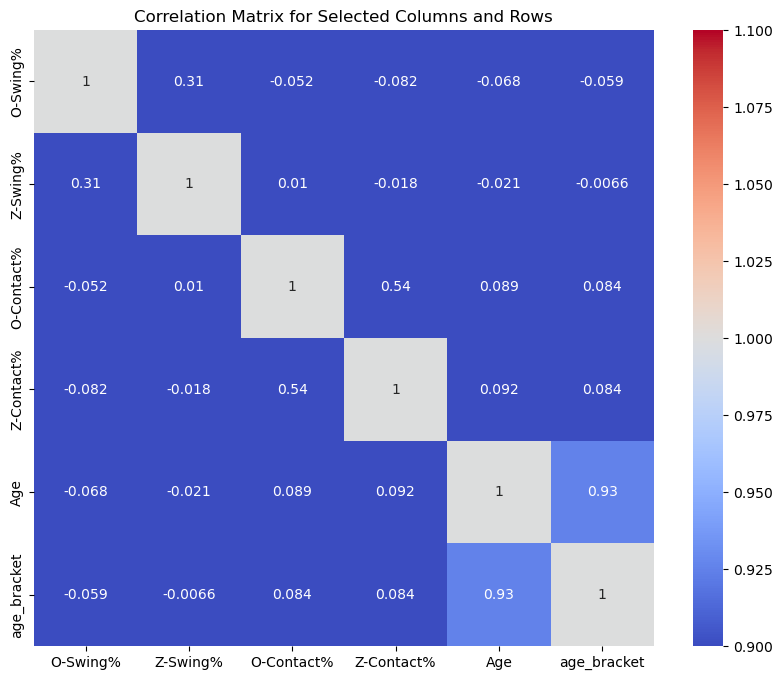

In [34]:
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix_subset, annot = True, cmap = 'coolwarm', vmin = 1, vmax = 1)
plt.title('Correlation Matrix for Selected Columns and Rows')
plt.show()

In [35]:
columns_of_interest = ['maxEV', 'HardHit', 'F-Strike%', 'WAR']

rows_of_interest = ['Age', 'age_bracket']

subset_df = master_summary_numeric_df[columns_of_interest + rows_of_interest]

correlation_matrix_subset = subset_df.corr()

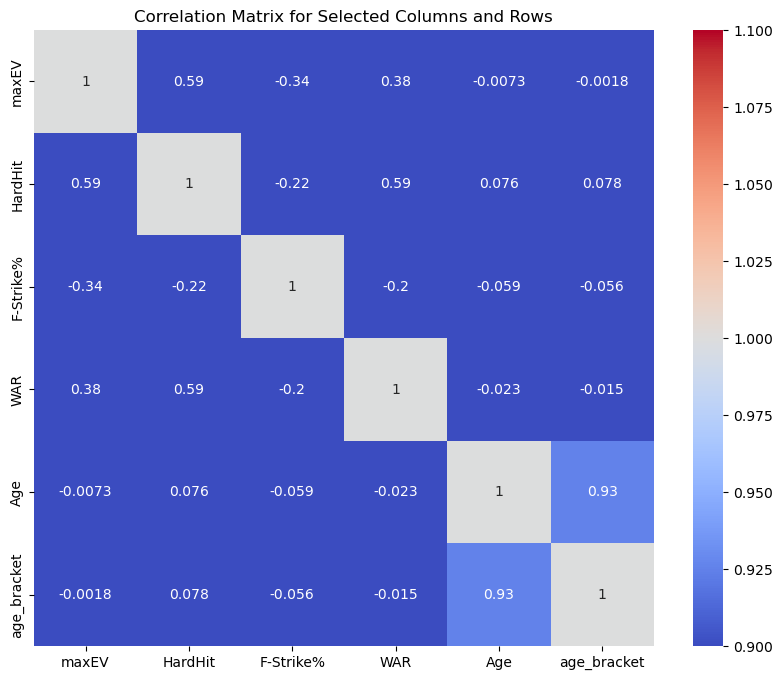

In [36]:
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix_subset, annot = True, cmap = 'coolwarm', vmin = 1, vmax = 1)
plt.title('Correlation Matrix for Selected Columns and Rows')
plt.show()

In [37]:
columns_of_interest = ['G', 'AB', 'PA', 'BB%']

rows_of_interest = ['Age', 'age_bracket']

subset_df = master_summary_numeric_df[columns_of_interest + rows_of_interest]

correlation_matrix_subset = subset_df.corr()

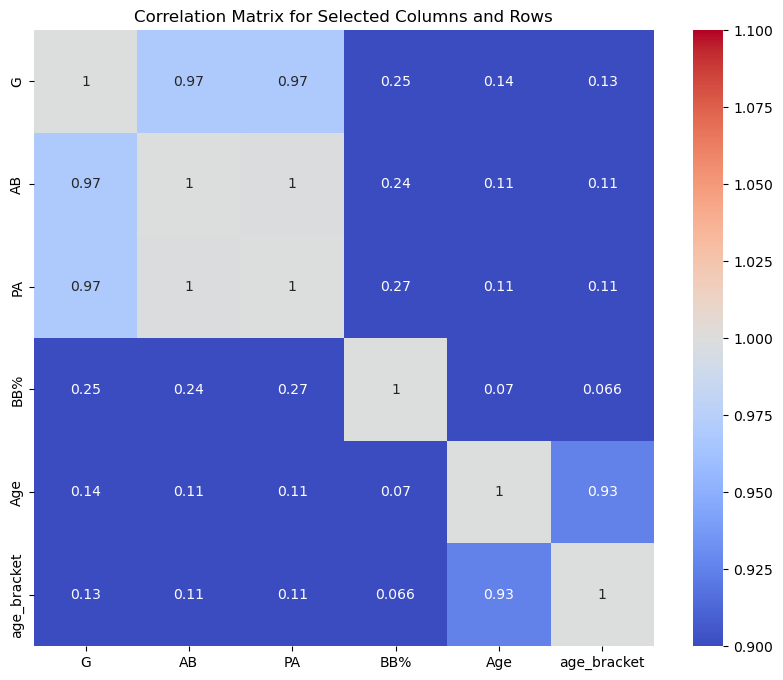

In [38]:
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix_subset, annot = True, cmap = 'coolwarm', vmin = 1, vmax = 1)
plt.title('Correlation Matrix for Selected Columns and Rows')
plt.show()